In [1]:
import sumie
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import skimage

%matplotlib inline

%load_ext autoreload

%autoreload 2

In [26]:
model = torchvision.models.vgg16(pretrained=True).eval()
sumie.utils.remove_inplace(model)
#model.avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pad

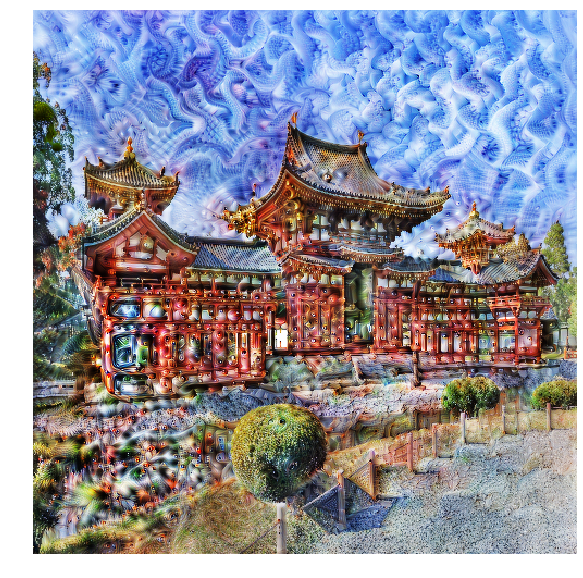

In [29]:
url = 'https://upload.wikimedia.org/wikipedia/commons/6/69/Phoenix_Hall%2C_Byodo-in%2C_November_2016_-01.jpg'
base_image = sumie.io.load_url(url, size=(500, 500))

im = sumie.Image(500, param='fft', transforms=[
                    sumie.transforms.PositionJitter(8),
                    sumie.transforms.Normalise(),
              ], init=base_image)

device = 'cuda'
im.to(device)
model.to(device)
opt = sumie.Optimiser()
objective = sumie.objectives.DeepDream(model.features[28])

opt.run(im, model.features, objective, iterations=50, lr=0.05)
sumie.vis.show(im.get_image(), figsize = (10, 10))

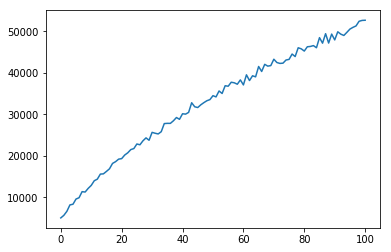

In [28]:
plt.plot([x.item() for x in opt.history])